In [1]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.19.1.


<div class="alert alert-block alert-info">
Version should be greater than or equal to 0.19.1
</div>

In [2]:
#External Libs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report

#External Algos
from sklearn.model_selection import train_test_split, GridSearchCV

#Custom Libs
from process import getDataset

#For display

from IPython.display import HTML, display
import tabulate

# Fetch Dataset

In [3]:
#Fetch Dataset
hr = getDataset('HR_comma_sep.csv')
# hr = pd.DataFrame(hr['data'],columns = hr['headers']).convert_objects(convert_numeric=True)
hr = pd.DataFrame(hr['data'],columns = hr['headers']).infer_objects()
print("DataSet:")
hr

DataSet:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.8,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.5,2,153,3,0,1,0,sales,low
6,0.1,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


# PreProcessing

In [4]:
#Encode Salary
salaryEncoder = LabelEncoder()
encodedSalary = salaryEncoder.fit_transform(hr['salary'])

#Representation in Encoder
table=[]
for i in list(salaryEncoder.classes_):
    table.append([i,salaryEncoder.transform([i])])

display(HTML(tabulate.tabulate(table, headers=['Class', 'Label'],tablefmt='html')))

Class,Label
high,0
low,1
medium,2


In [5]:
#Create datasets
# X contains 
# satisfaction_level
#,last_evaluation
#,number_project
#,average_montly_hours
#,time_spend_company
#,Work_accident
#,promotion_last_5years
#,salary
x = hr.drop(columns = ['left','sales'])#.infer_objects()
#Y contains Left
y = pd.to_numeric(hr['left'].values)

In [6]:
#Replace salary with it's encoded values
x['salary'] = encodedSalary

In [7]:
print("Encoded Inputs: ")
x

Encoded Inputs: 


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,0,1
1,0.8,0.86,5,262,6,0,0,2
2,0.11,0.88,7,272,4,0,0,2
3,0.72,0.87,5,223,5,0,0,1
4,0.37,0.52,2,159,3,0,0,1
5,0.41,0.5,2,153,3,0,0,1
6,0.1,0.77,6,247,4,0,0,1
7,0.92,0.85,5,259,5,0,0,1
8,0.89,1,5,224,5,0,0,1
9,0.42,0.53,2,142,3,0,0,1


In [8]:
# Feature Scaling
sc = StandardScaler()
x = sc.fit_transform(x)

In [9]:
print("Feature Scaled Inputs: ")
x

Feature Scaled Inputs: 


array([[-0.93649469, -1.08727529, -1.46286291, ..., -0.41116529,
        -0.14741182, -0.55495458],
       [ 0.75281433,  0.84070693,  0.97111292, ..., -0.41116529,
        -0.14741182,  1.04300352],
       [-2.02247906,  0.95755433,  2.59376348, ..., -0.41116529,
        -0.14741182,  1.04300352],
       ...,
       [-0.97671633, -1.08727529, -1.46286291, ..., -0.41116529,
        -0.14741182, -0.55495458],
       [-2.02247906,  1.42494396,  1.7824382 , ..., -0.41116529,
        -0.14741182, -0.55495458],
       [-0.97671633, -1.14569899, -1.46286291, ..., -0.41116529,
        -0.14741182, -0.55495458]])

# CrossValidation

In [10]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [11]:
#Calculating Accuracy of any model on the present data
def evaluate_on_test_data(tests, predictions) :
    correct_classifications = 0
    for i in range(len(tests)) :
        if predictions[i] == tests[i] :
            correct_classifications += 1
    accuracy = 100*correct_classifications/len(tests)
    return accuracy 

# Training

### Most Efficient RBF Classifier

In [23]:
#Most Efficient Classifier - Based on previous Analysis
from sklearn.svm import SVC
classifier = SVC(C=10,kernel='rbf', gamma=12)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)
print("Accuracy of the SVC model with kernel:%s  =  %s%%" % (classifier.kernel,evaluate_on_test_data(y_test, y_pred)))

Accuracy of the SVC model with kernel:rbf  =  98.34666666666666%


In [29]:
print(y_pred.ndim)
Z=y_pred.reshape(3750,2)
plt.contourf(x_test, y_test, y_pred, cmap=plt.cm.Paired)

1


ValueError: cannot reshape array of size 3750 into shape (3750,2)

### RBF Classifier Hyperparameters search

In [13]:
#Find the most efficient Classifier
Cs = [0.001, 0.01, 0.1, 1, 10, 12, 20, 100]
gammas = [0.001, 0.01, 0.1, 0.5, 1, 2, 2.5, 10, 12, 14, 16]
param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid)
grid_search.fit(x_train, y_train)

#Print results for the most efficient classifier
y_true, y_pred = y_test, grid_search.predict(x_test)
print(classification_report(y_true, y_pred))

#Print accuracy
print("Accuracy of the SVC model with kernel:rbf  =  %s%%" % (evaluate_on_test_data(y_test, y_pred)))

             precision    recall  f1-score   support

          0       0.98      0.99      0.99      2881
          1       0.98      0.95      0.96       869

avg / total       0.98      0.98      0.98      3750

Accuracy of the SVC model with kernel:rbf  =  98.26666666666667%


In [14]:
grid_search.best_params_

{'C': 10, 'gamma': 10}

In [18]:
grid_search.grid_scores_

/home/achopra/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.75980, std: 0.00010, params: {'C': 0.001, 'gamma': 0.001},
 mean: 0.75980, std: 0.00010, params: {'C': 0.001, 'gamma': 0.01},
 mean: 0.75980, std: 0.00010, params: {'C': 0.001, 'gamma': 0.1},
 mean: 0.75980, std: 0.00010, params: {'C': 0.001, 'gamma': 0.5},
 mean: 0.75980, std: 0.00010, params: {'C': 0.001, 'gamma': 1},
 mean: 0.75980, std: 0.00010, params: {'C': 0.001, 'gamma': 2},
 mean: 0.75980, std: 0.00010, params: {'C': 0.001, 'gamma': 2.5},
 mean: 0.75980, std: 0.00010, params: {'C': 0.001, 'gamma': 10},
 mean: 0.75980, std: 0.00010, params: {'C': 0.001, 'gamma': 12},
 mean: 0.75980, std: 0.00010, params: {'C': 0.001, 'gamma': 14},
 mean: 0.75980, std: 0.00010, params: {'C': 0.001, 'gamma': 16},
 mean: 0.75980, std: 0.00010, params: {'C': 0.01, 'gamma': 0.001},
 mean: 0.75980, std: 0.00010, params: {'C': 0.01, 'gamma': 0.01},
 mean: 0.90604, std: 0.00439, params: {'C': 0.01, 'gamma': 0.1},
 mean: 0.93973, std: 0.00057, params: {'C': 0.01, 'gamma': 0.5},
 mean: 0.89492, 

/home/achopra/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


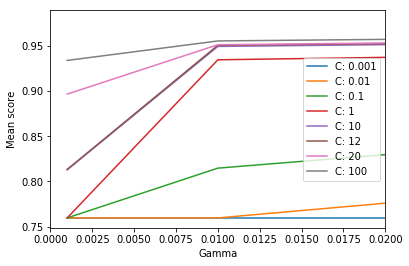

In [45]:
Gammas = [0,0.1,0.5,1.2,3.4,4.5,5,5.1,5.2,5.3,5.4]
scores = [x[1] for x in grid_search.grid_scores_]
scores = np.array(scores).reshape(len(Cs), len(gammas))

for ind, i in enumerate(Cs):
    plt.plot(gammas, scores[ind], label='C: ' + str(i))
plt.legend()
plt.xlabel('Gamma')
plt.ylabel('Mean score')
plt.xlim(0,0.02)
plt.show()

In [32]:
grid_search.get_params()

{'cv': None,
 'error_score': 'raise',
 'estimator': SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 'estimator__C': 1.0,
 'estimator__cache_size': 200,
 'estimator__class_weight': None,
 'estimator__coef0': 0.0,
 'estimator__decision_function_shape': 'ovr',
 'estimator__degree': 3,
 'estimator__gamma': 'auto',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__probability': False,
 'estimator__random_state': None,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'fit_params': None,
 'iid': True,
 'n_jobs': 1,
 'param_grid': {'C': [0.001, 0.01, 0.1, 1, 10, 12, 20, 100],
  'gamma': [0.001, 0.01, 0.1, 0.5, 1, 2, 2.5, 10, 12, 14, 16]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': 'warn',
 'scoring': None,
 'verbose': 0}

In [46]:
# https://stackoverflow.com/questions/37161563/how-to-graph-grid-scores-from-gridsearchcv
# https://stackoverflow.com/questions/19055729/decision-boundary-from-sklearn
# https://chrisalbon.com/machine_learning/support_vector_machines/svc_parameters_using_rbf_kernel/
# http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html
# https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed

In [ ]:
# http://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# https://chrisalbon.com/machine_learning/preprocessing_structured_data/convert_pandas_categorical_column_into_integers_for_scikit-learn/